In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")





In [2]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.size

10692

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
col_names = df.columns
for col in col_names:
  print(col+ "-" + str(df[col].isnull().sum()))

PassengerId-0
Survived-0
Pclass-0
Name-0
Sex-0
Age-177
SibSp-0
Parch-0
Ticket-0
Fare-0
Cabin-687
Embarked-2


In [10]:
#Lets drop cabin column
df.drop("Cabin",axis=1,inplace=True)

In [12]:
#Lets fill nan values in age column with mean of that column
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [13]:
#Lets drop two records where embarked is null
df.dropna(inplace=True)

In [14]:
col_names = df.columns
for col in col_names:
  print(col+ "-" + str(df[col].isnull().sum()))

PassengerId-0
Survived-0
Pclass-0
Name-0
Sex-0
Age-0
SibSp-0
Parch-0
Ticket-0
Fare-0
Embarked-0


In [16]:
#Lets drop passenger_id
df.drop("PassengerId",axis=1,inplace=True)

In [19]:
#Since column ticket is bit noisy lets drop it
df.drop("Ticket",axis=1,inplace=True)

In [20]:
#Lets replace sex column with numerical data
df["Sex"].replace({"male":0,"female":1},inplace=True)

In [21]:
#Lets check count of embarked column data
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [33]:
df["Embarked"].replace({"S":0,"C":1,"D":2,"Q":3},inplace=True)

In [23]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.00,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.00,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.45,0
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.00,1
890,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,7.75,Q


In [24]:
#Lets convert ages data to near integer value
df["Age"] = df["Age"].apply(np.floor)

In [26]:
# Now extract title from the Name column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Normalize similar titles
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# One-hot encode the new Title feature
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Drop the original Name column
df.drop('Name', axis=1, inplace=True)


In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,0,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,1,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,0,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,0,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,0,False,True,False,False


In [30]:
df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']] = df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']].astype(int)


In [31]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object
Title_Miss,int64
Title_Mr,int64


In [34]:
#Lets change dtype of age and embarked to int
df["Age"] = df["Age"].astype(int)
df["Embarked"] = df["Embarked"].astype(int)

In [37]:
df.Survived.value_counts()

,count
Survived,
0,549
1,340


Text(0, 0.5, 'Passenger Count')

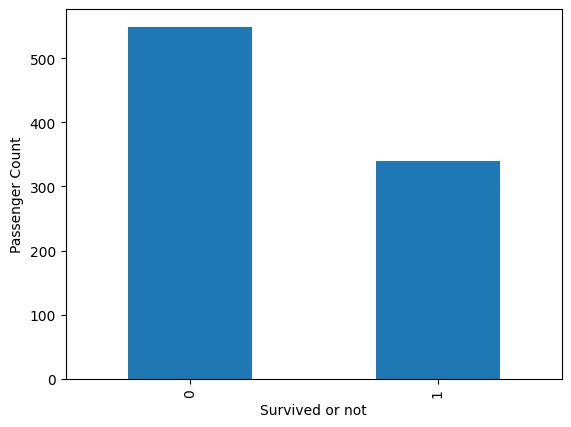

In [39]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

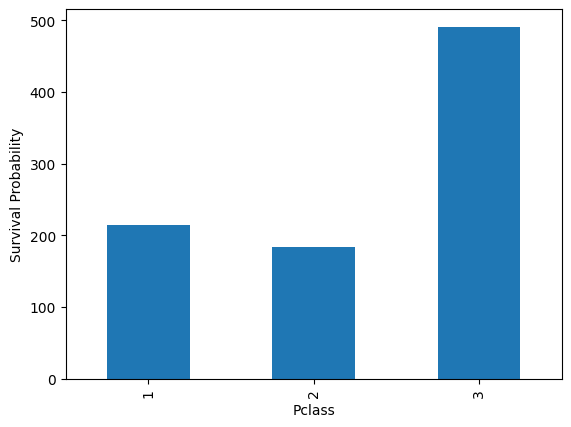

In [40]:
plt = df.Pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [41]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,214
2,184
3,491


In [42]:
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,134
2,87
3,119


Text(0, 0.5, 'Survival Probability')

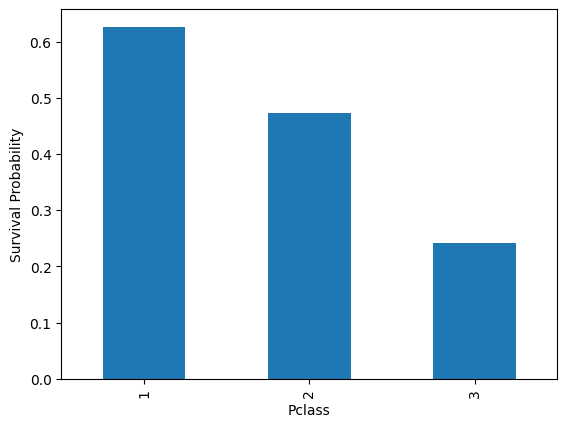

In [45]:
# Pclass - Survival probability
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')


[Text(0, 0, 'Male (0)'), Text(1, 0, 'Female (1)')]

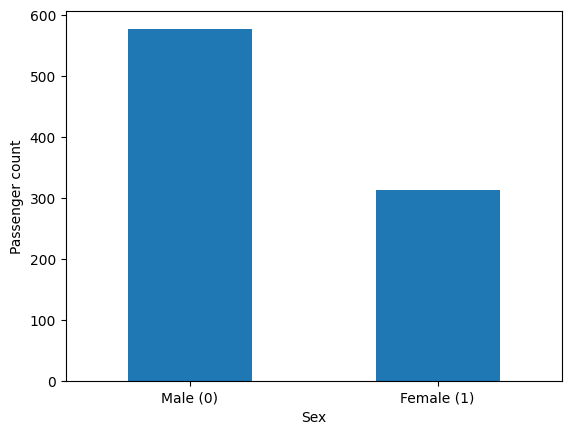

In [47]:
plt = df.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')
plt.set_xticklabels(['Male (0)', 'Female (1)'], rotation=0)

[Text(0, 0, 'Male (0)'), Text(1, 0, 'Female (1)')]

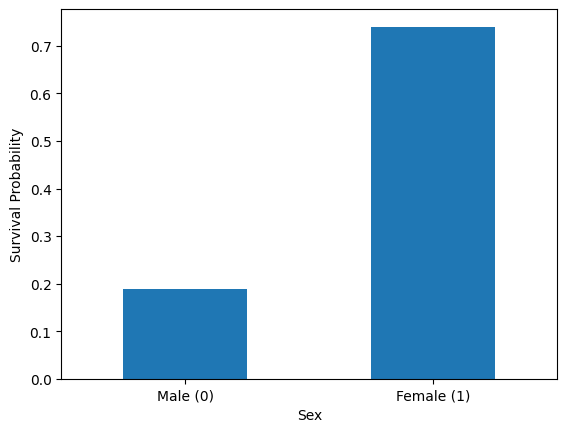

In [48]:
plt = df[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')
plt.set_xticklabels(['Male (0)', 'Female (1)'], rotation=0)

Text(0, 0.5, 'Passenger count')

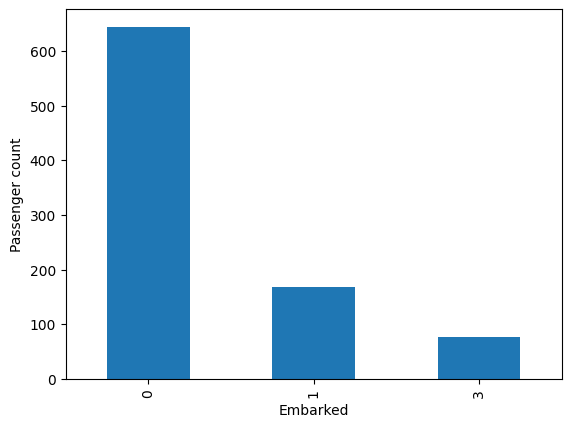

In [52]:
plt = df.Embarked.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')